# Boston house prices
## The task is to predict the price of the house (regression problem).
### Used "Boston house prices" dataset.

# Import libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_squared_error

%matplotlib inline

# Load dataset

In [3]:
file_name = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
data = pd.read_csv(file_name,delim_whitespace=True,header=None,names=names)

# Descriptive statistics

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
data.shape

(506, 14)

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


+ data has different scales, so standardization may be useful

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


+ data doesn't have null values
+ all features are numeric, so no type-casting is needed

# Data visualizations

## Violinplot on non-standardized data

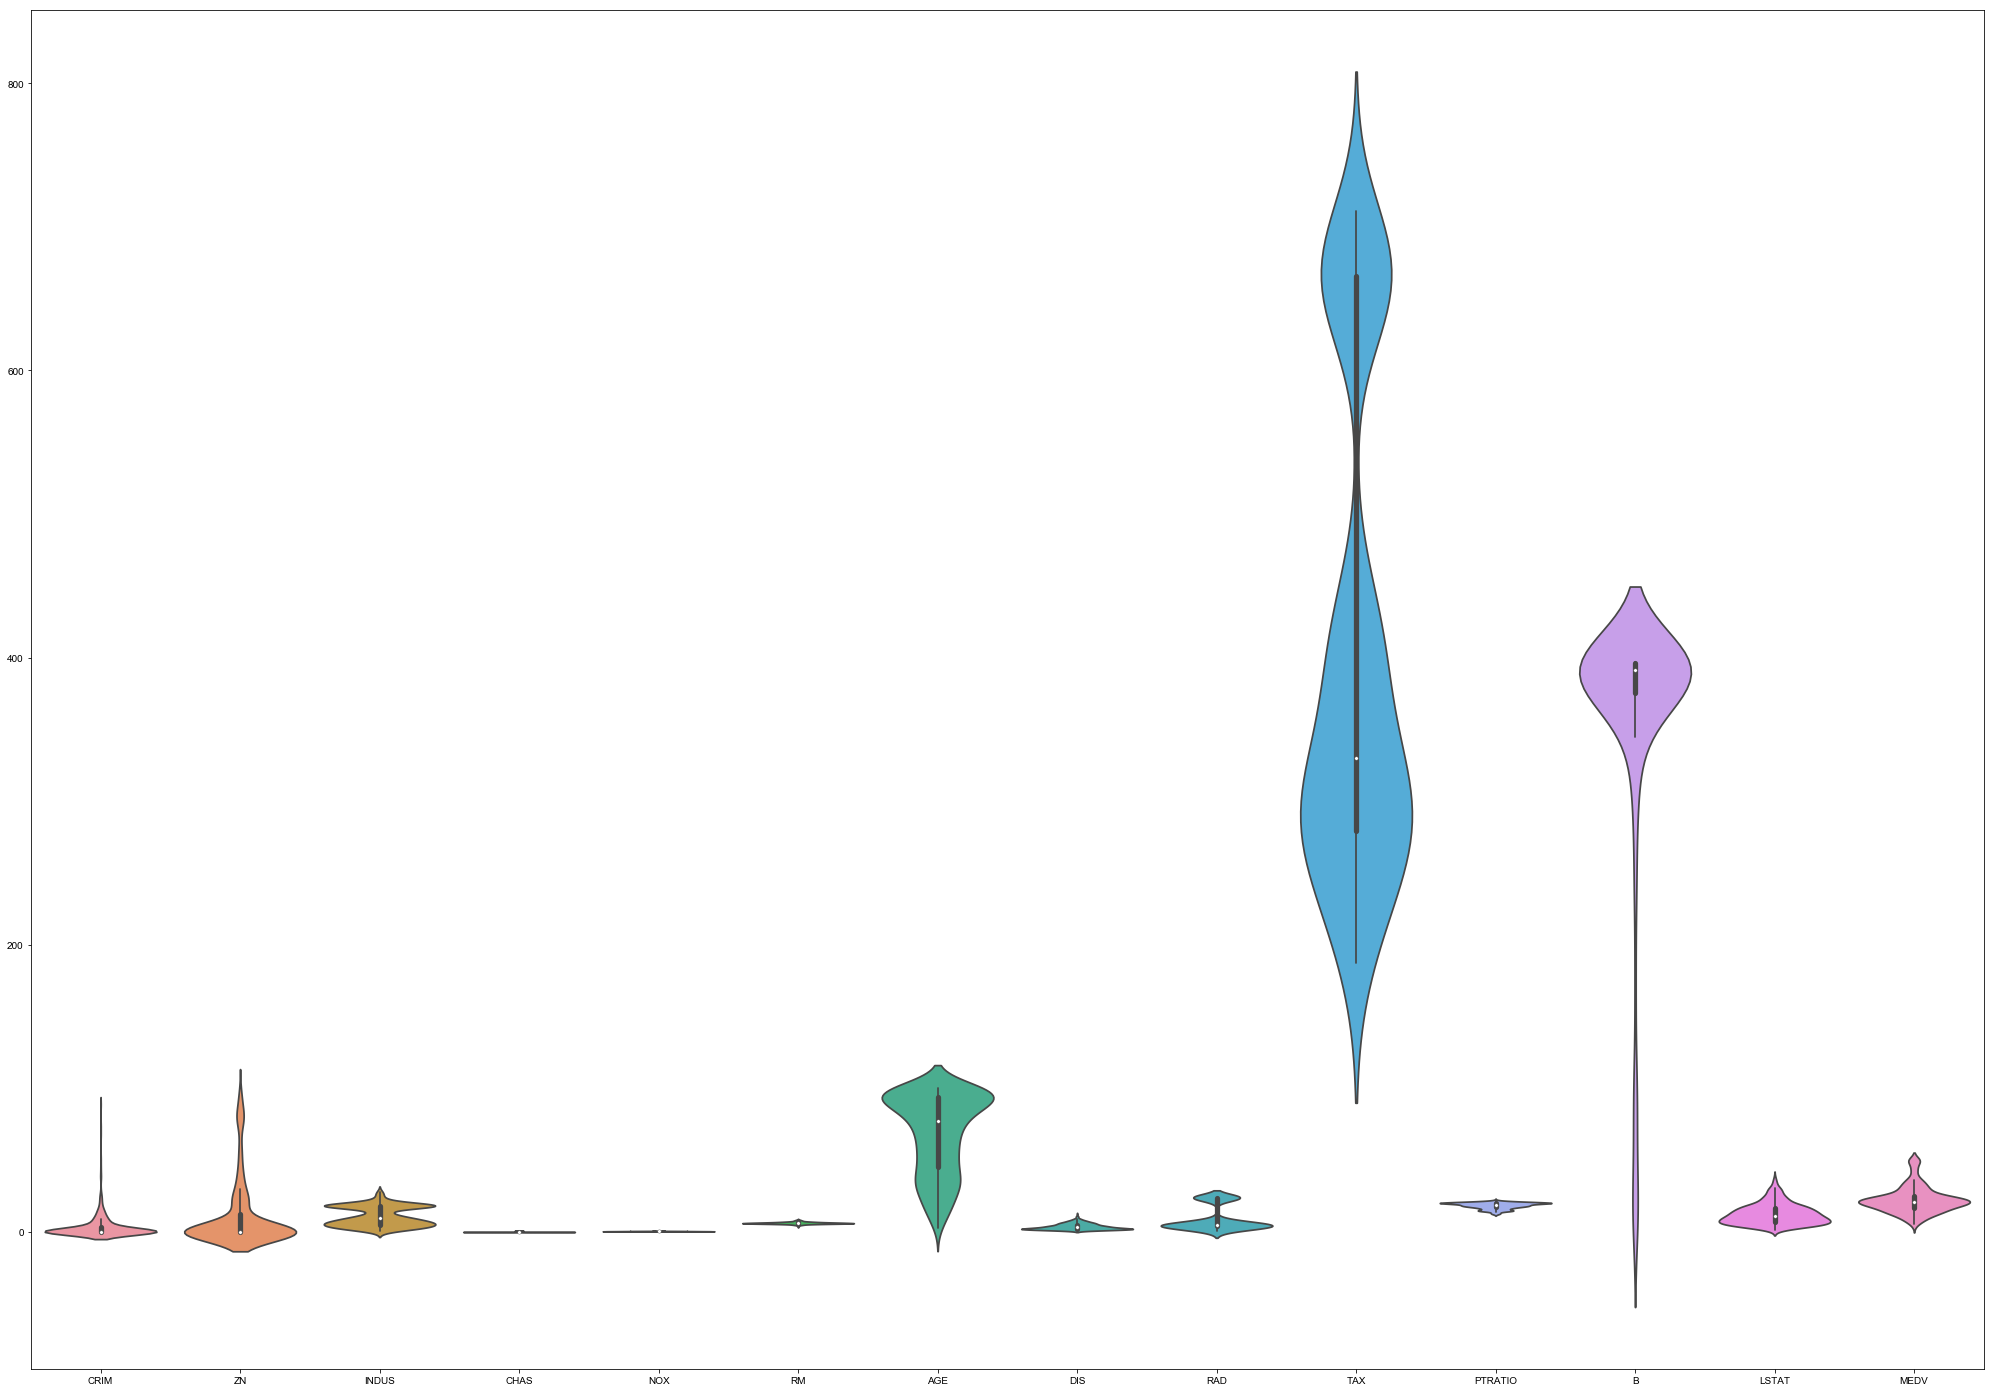

In [8]:
plt.subplots(figsize=(35,25))
sns.set(font_scale=2.5)
sns.violinplot(data=data,scale='width')

+ Check distributions on non-standardized data

## Violinplot on standardized data

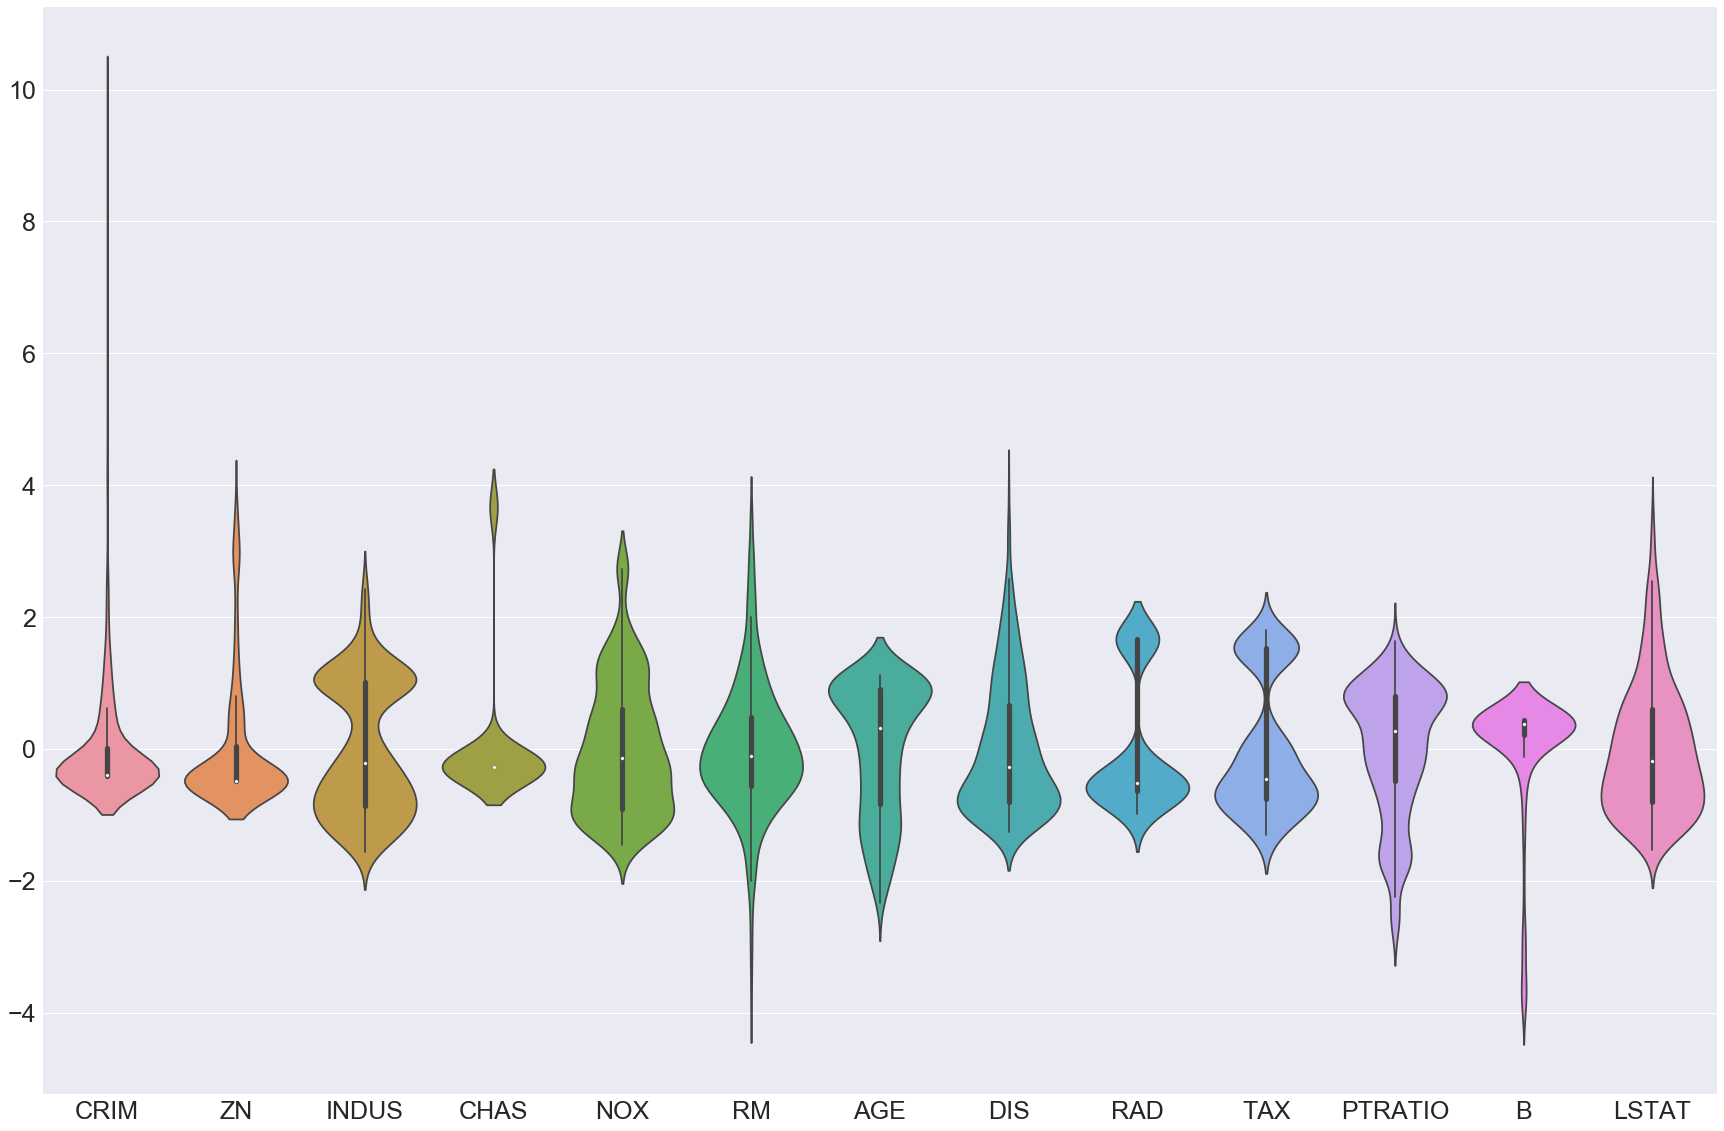

In [9]:
X  = data.values[:,:13]

c_x = StandardScaler().fit_transform(X)
plt.subplots(figsize=(30,20))
sns.violinplot(data=pd.DataFrame(c_x,columns=names[:len(names)-1]),scale='width')

+ Check distributions on standardized data
+ some attributes have possible outliers (CRIM, ZN, CHAS, RM, B)

## Boxplot

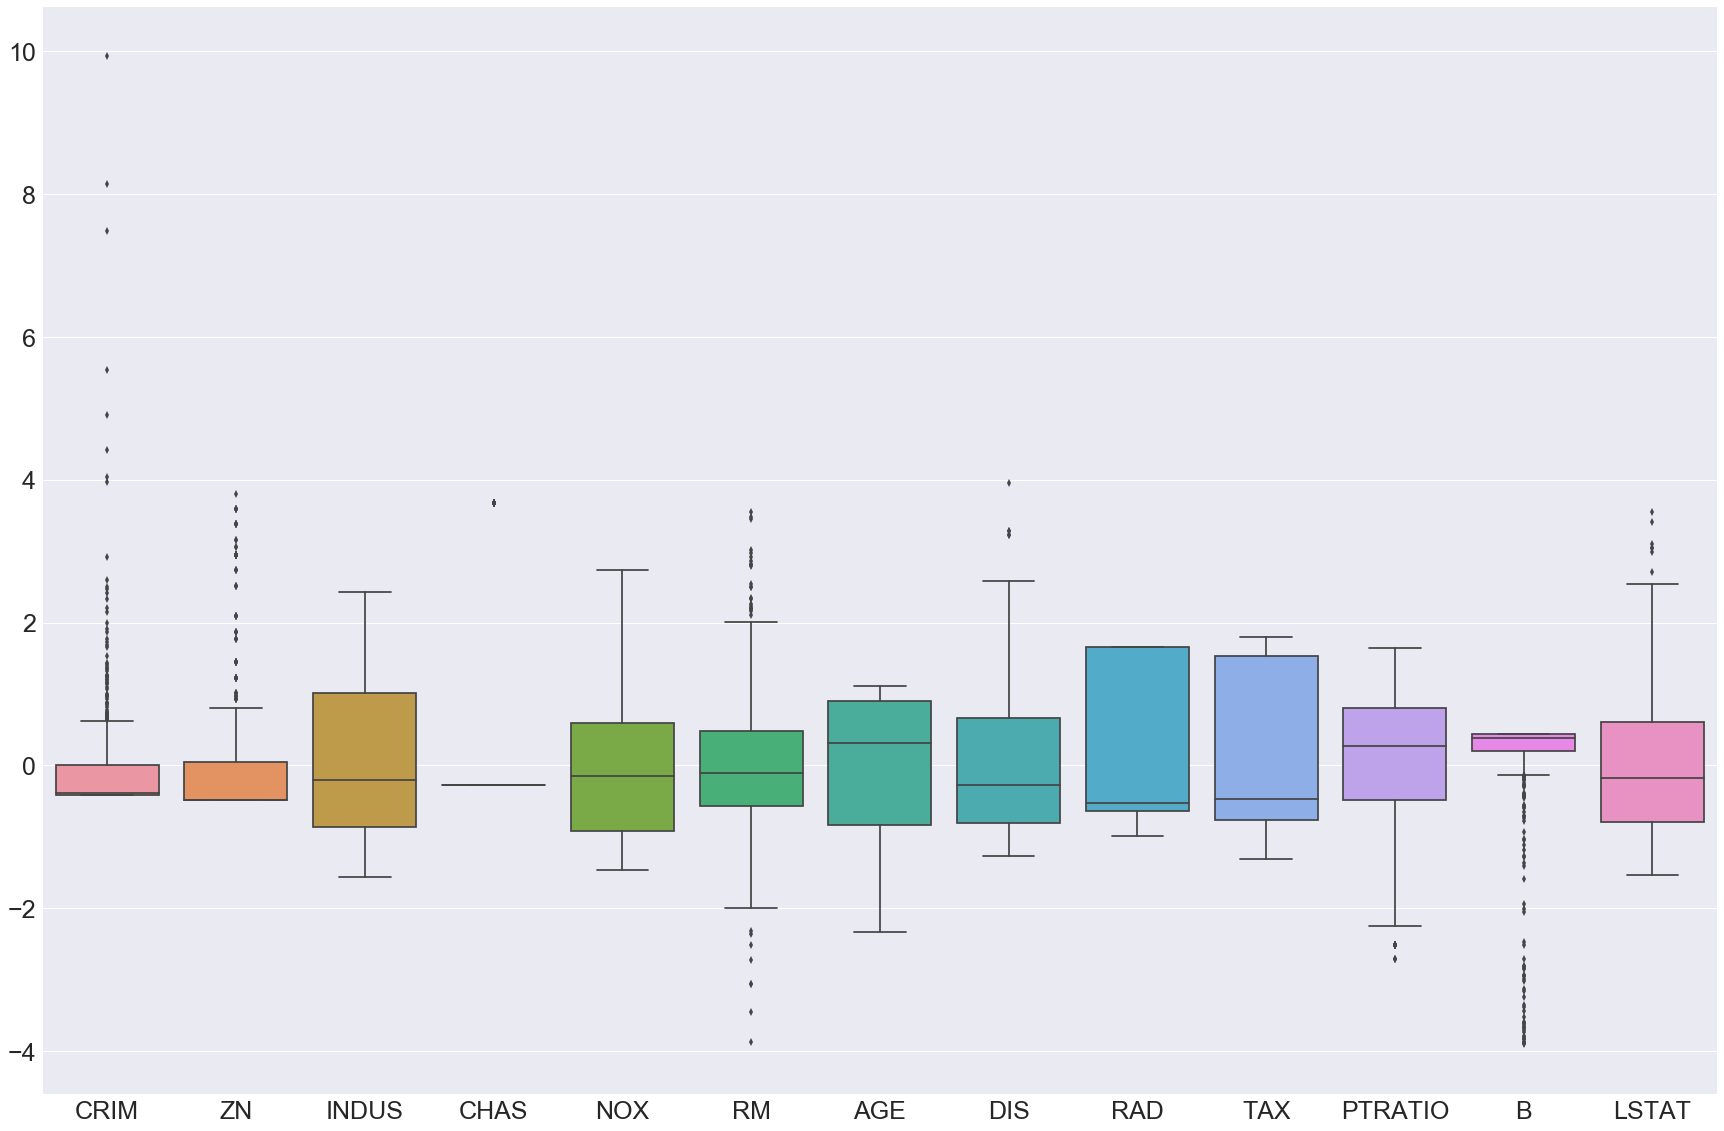

In [10]:
plt.subplots(figsize=(30,20))
sns.boxplot(data=pd.DataFrame(c_x,columns=names[:len(names)-1]))

+ some attributes have possible outliers (CRIM, ZN, CHAS, RM, B)+ 

# Correlation plot

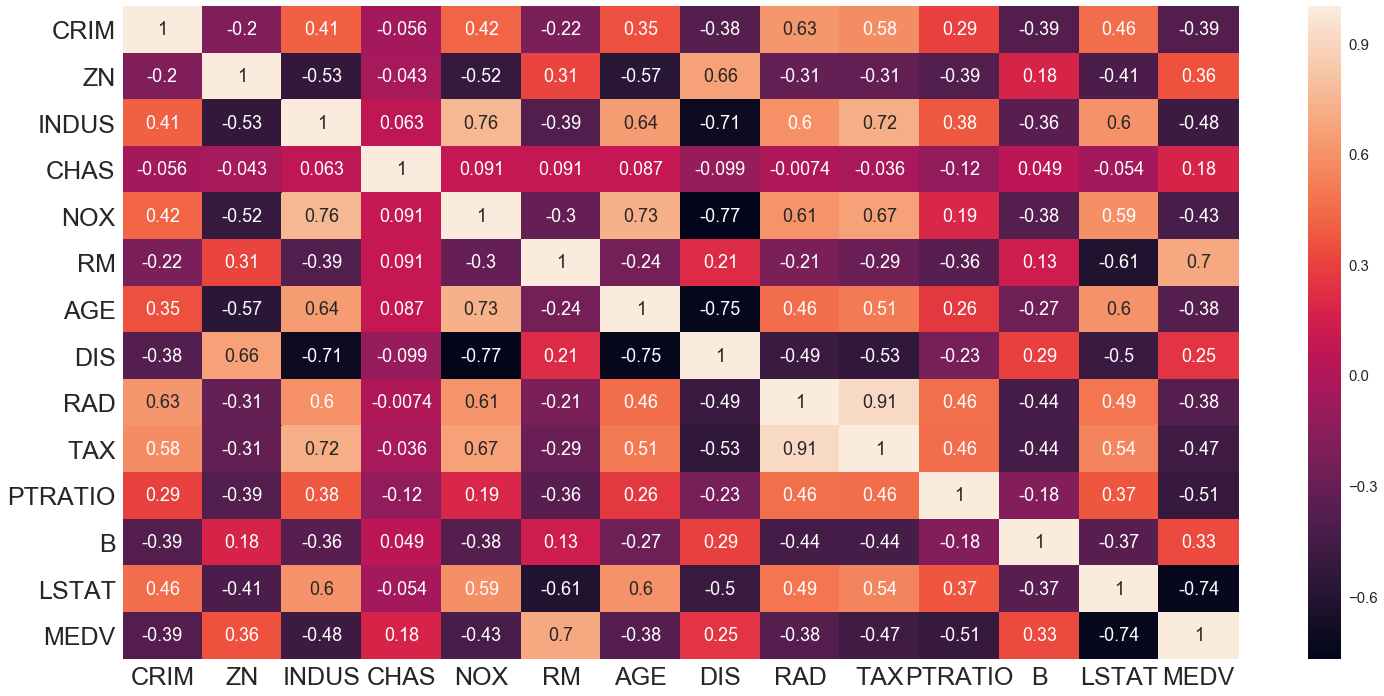

In [11]:
plt.subplots(figsize=(25,12))
sns.set(font_scale=1.5)
sns.heatmap(data.corr(),annot=True)

+ some values have high correlations (NOX-INDUS, AGE-NOX, TAX-RAD, MEDV-LSTAT, DIS-NOX)
# Histograms and lineplots of attributes

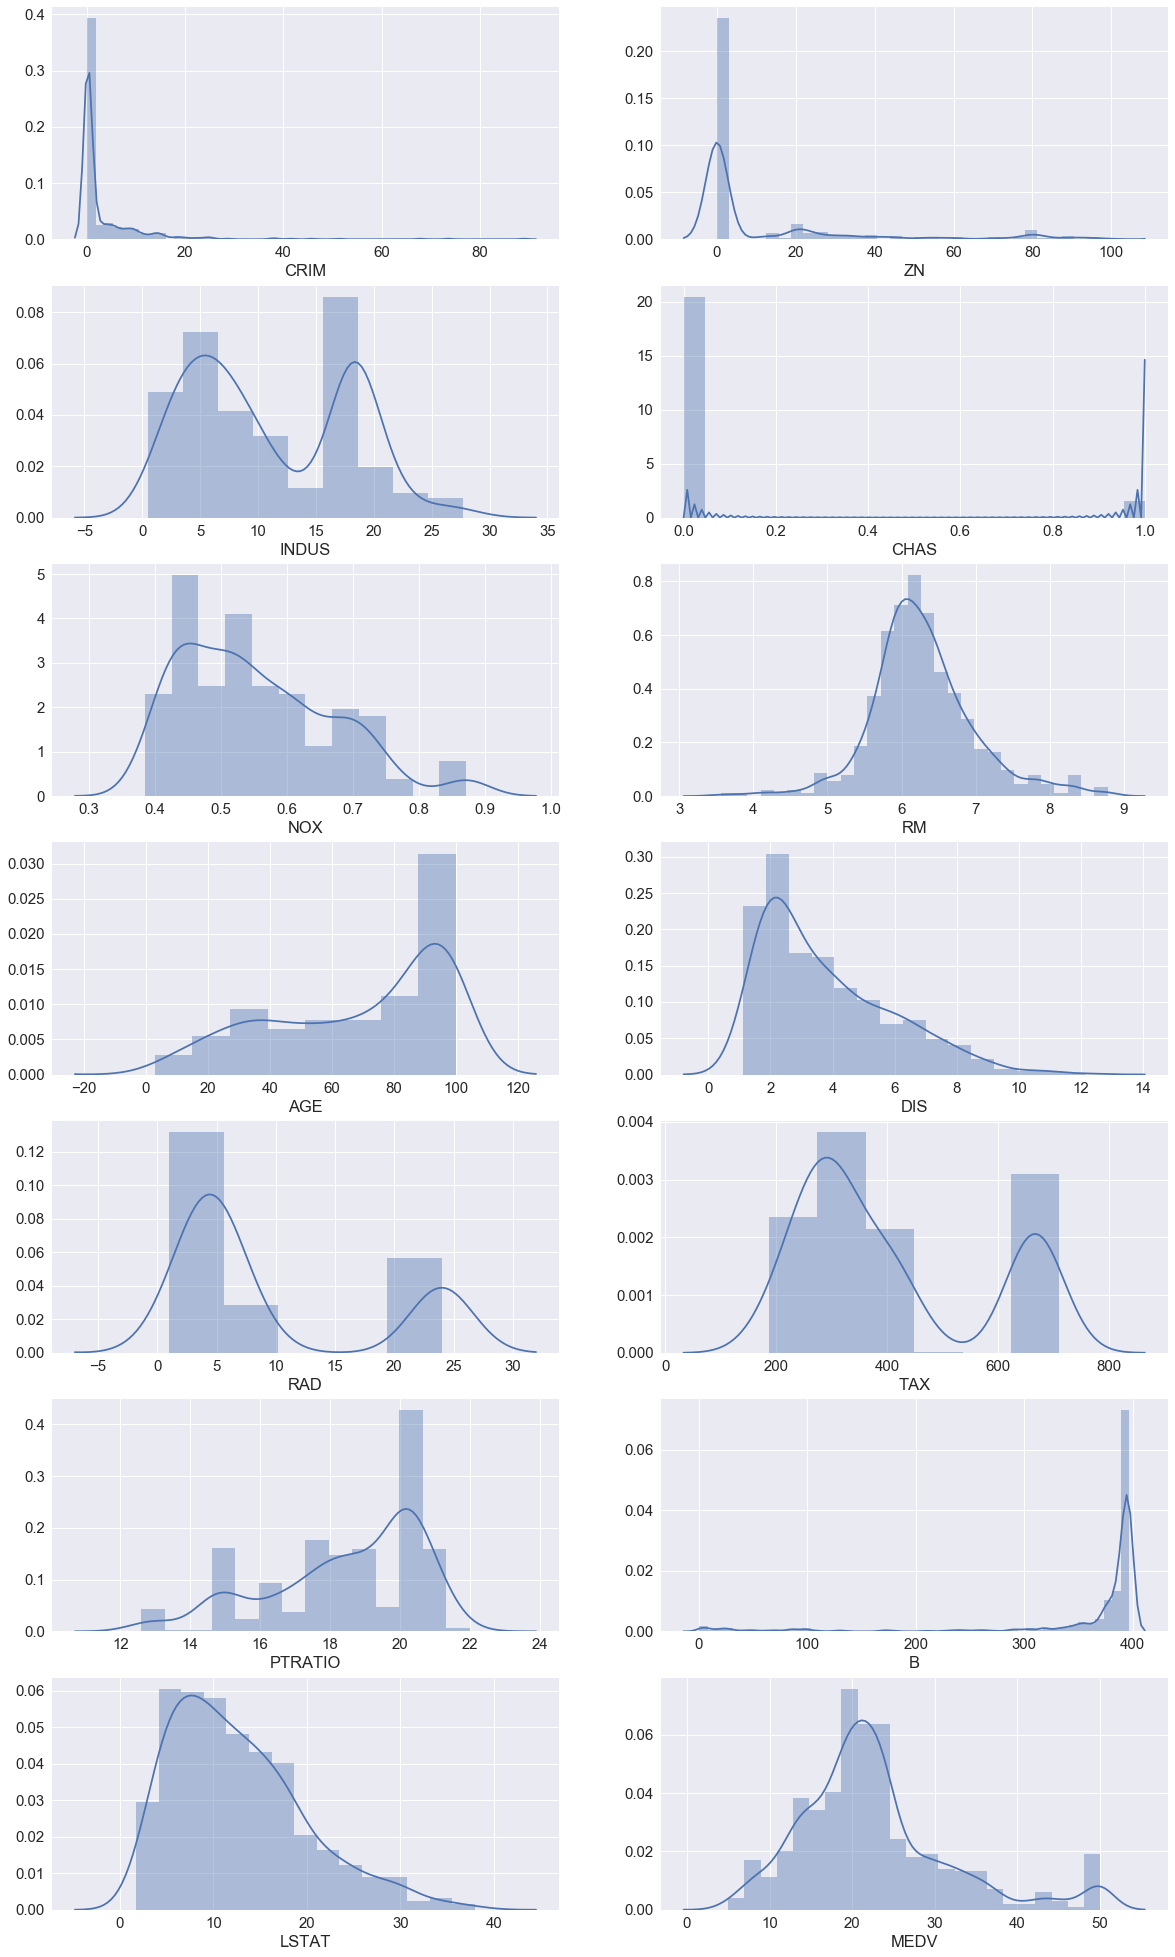

In [12]:
fig, ax = plt.subplots(ncols=2,nrows=7,sharex=False,sharey=False,figsize=(20,35))

row=0
col=0
for name in data.columns:
    sns.distplot(data[name],ax=ax[row][col])
    col+=1
    if col==2:
        row+=1
        col=0


+ exponential distributions: CRIM, ZN, B
+ mutlimodal distributions: RAD, TAX
+ skewed Gaussian: DIS, AGE, LSTAT
+ Gaussian: RM
## Check data skewness

In [13]:
data.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

# Pairplots

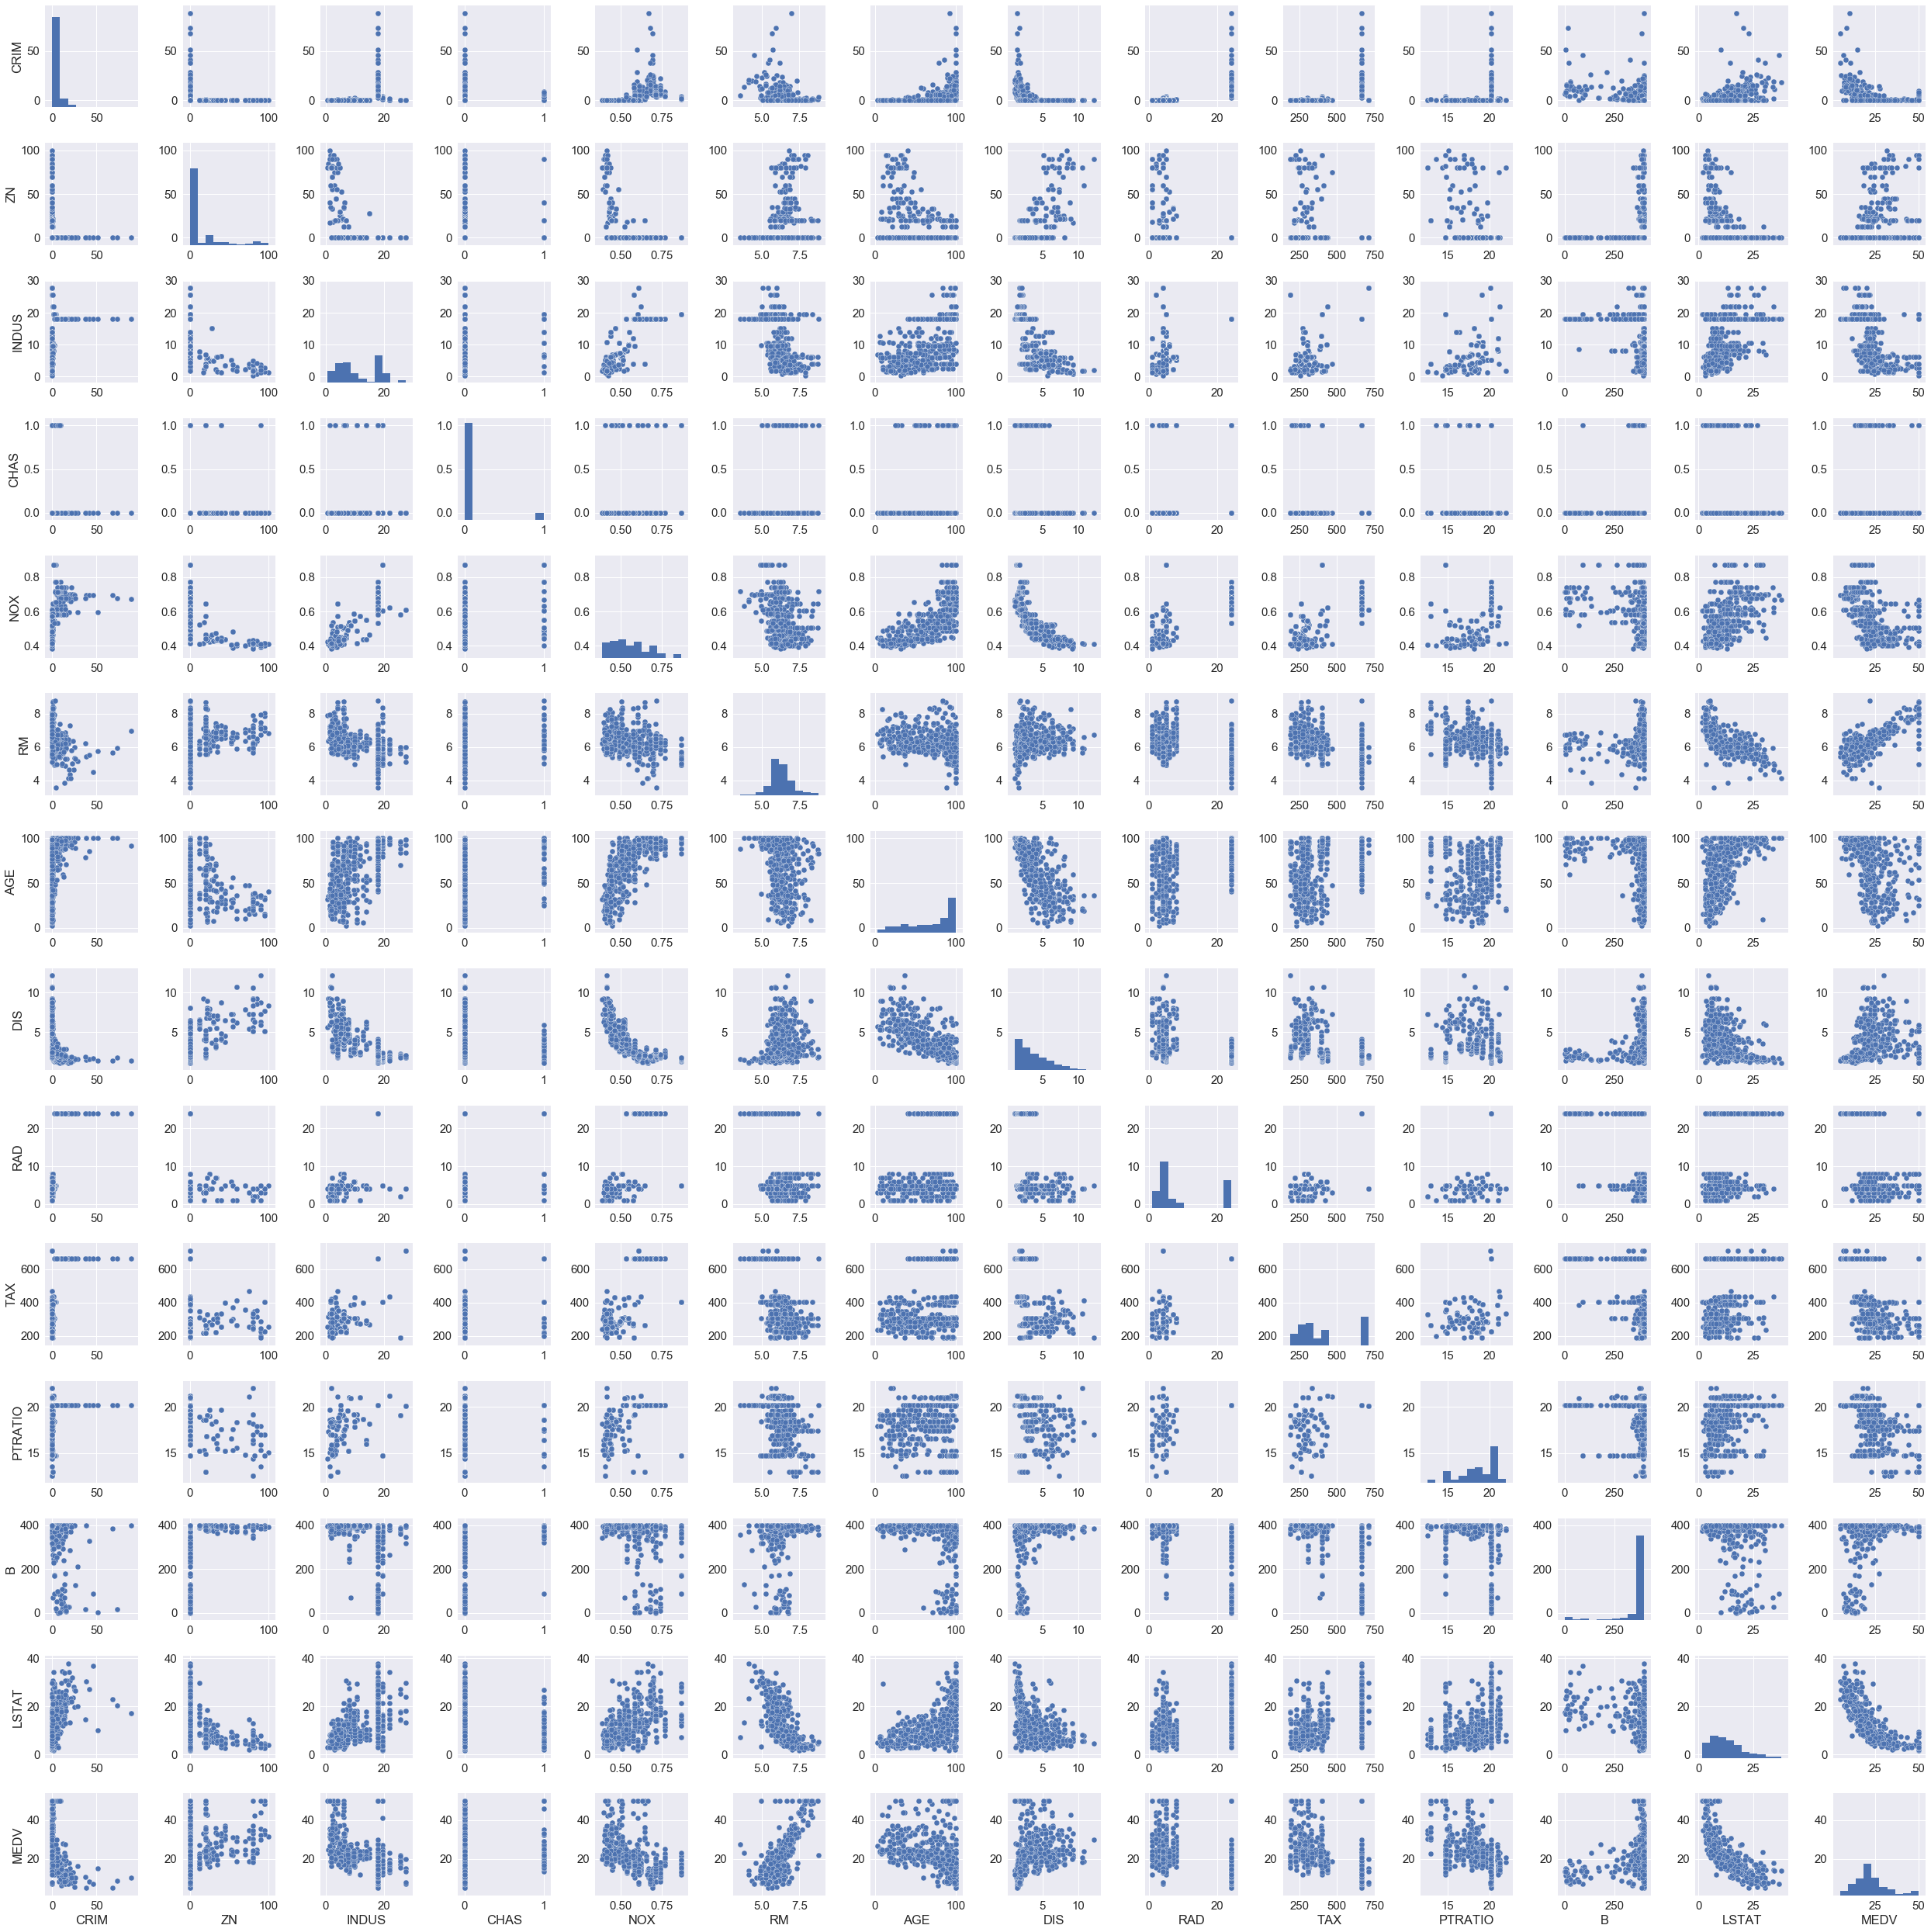

In [14]:
# plt.subplots(figsize=(25,15))
sns.pairplot(data)

## Divide train and evaluation sets

In [15]:
values = data.values
X = values[:,:13]
Y = values[:,-1]

seed = 7
val_size = 0.2
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size = val_size,random_state=seed)

# Test different algorithms to choose the best one

In [16]:
models = []
models.append(('LR',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('SVM',SVR()))

results = []
names = []
for name, model in models:
    k_fold = KFold(n_splits=10,random_state=seed)
    curr_scores = cross_val_score(model,X_train,Y_train,cv=k_fold,scoring='neg_mean_squared_error')
    
    results.append(curr_scores)
    names.append(name)
    
    print('%s: err(%.3f%%) std(%.3f%%)'%(name,-1*curr_scores.mean(),curr_scores.std()))

LR: err(21.380%) std(9.414%)
Ridge: err(21.498%) std(9.473%)
LASSO: err(26.424%) std(11.651%)
EN: err(27.502%) std(12.305%)
CART: err(21.516%) std(9.957%)
KNN: err(41.896%) std(13.902%)
SVM: err(85.518%) std(31.995%)


# Choose the best models

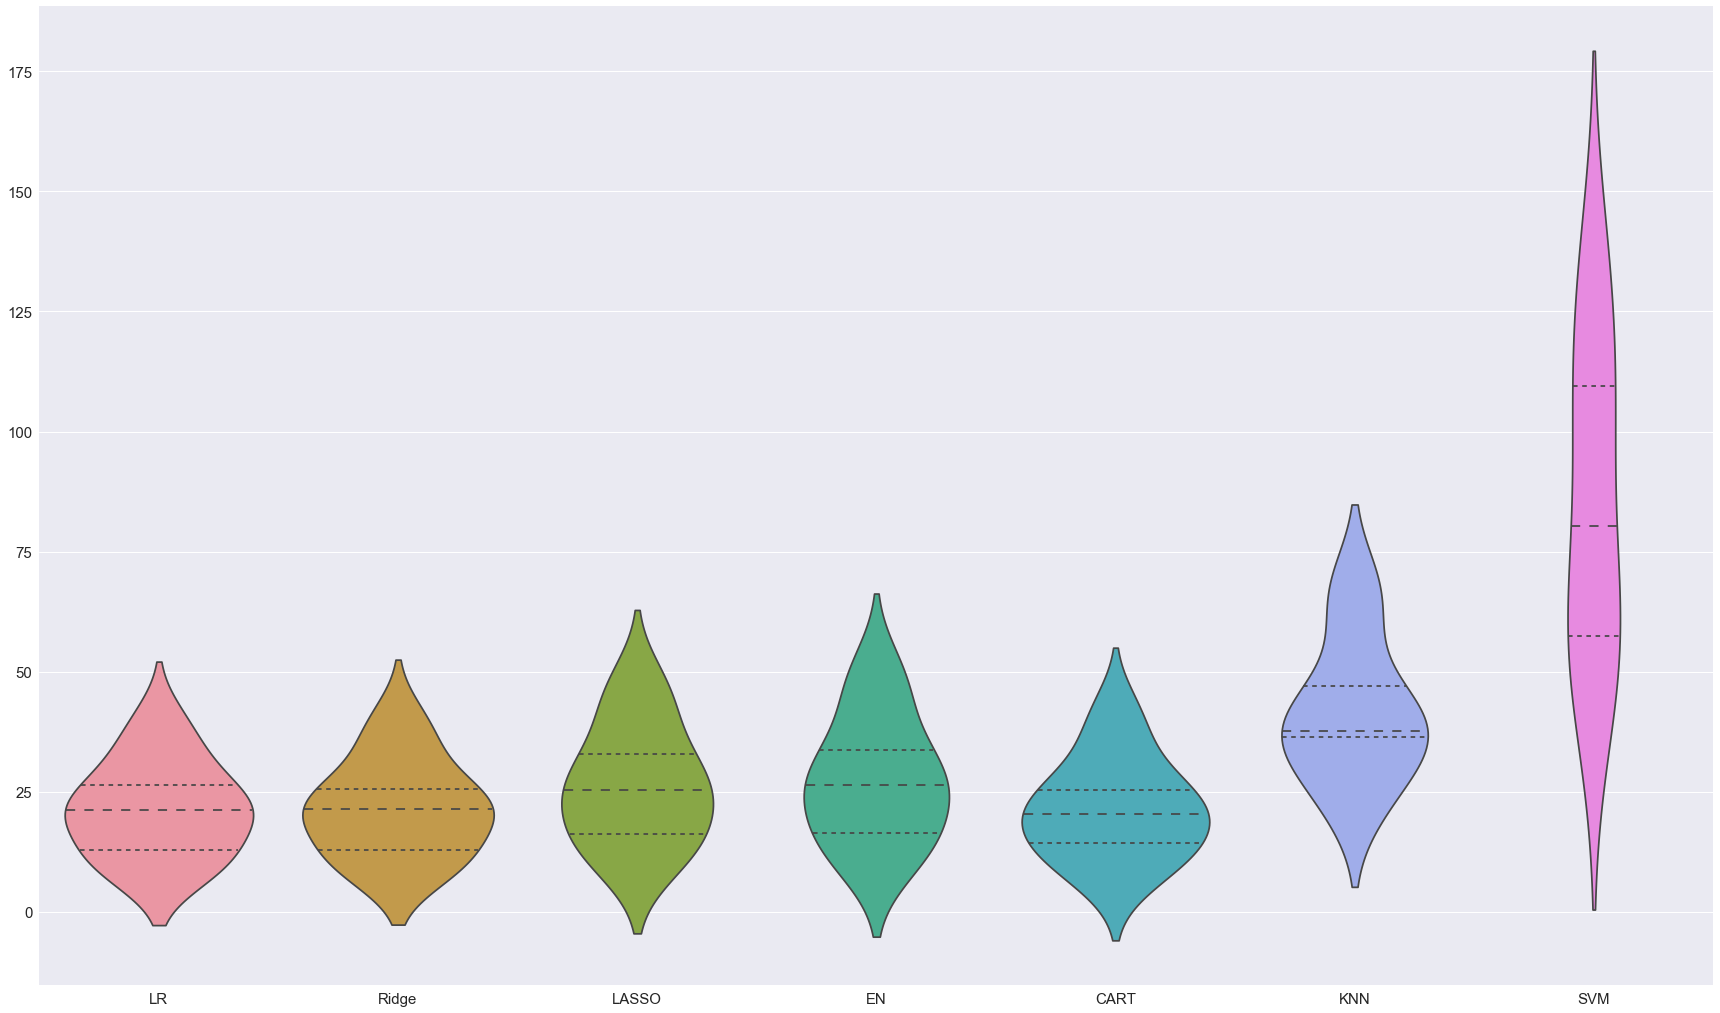

In [17]:
df = pd.DataFrame(np.array(np.multiply(-1,results)).T,columns=names)
plt.subplots(figsize=(30,18))
sns.set(font_scale=2.5)
sns.violinplot(data=df,scale='area',inner='quartile')

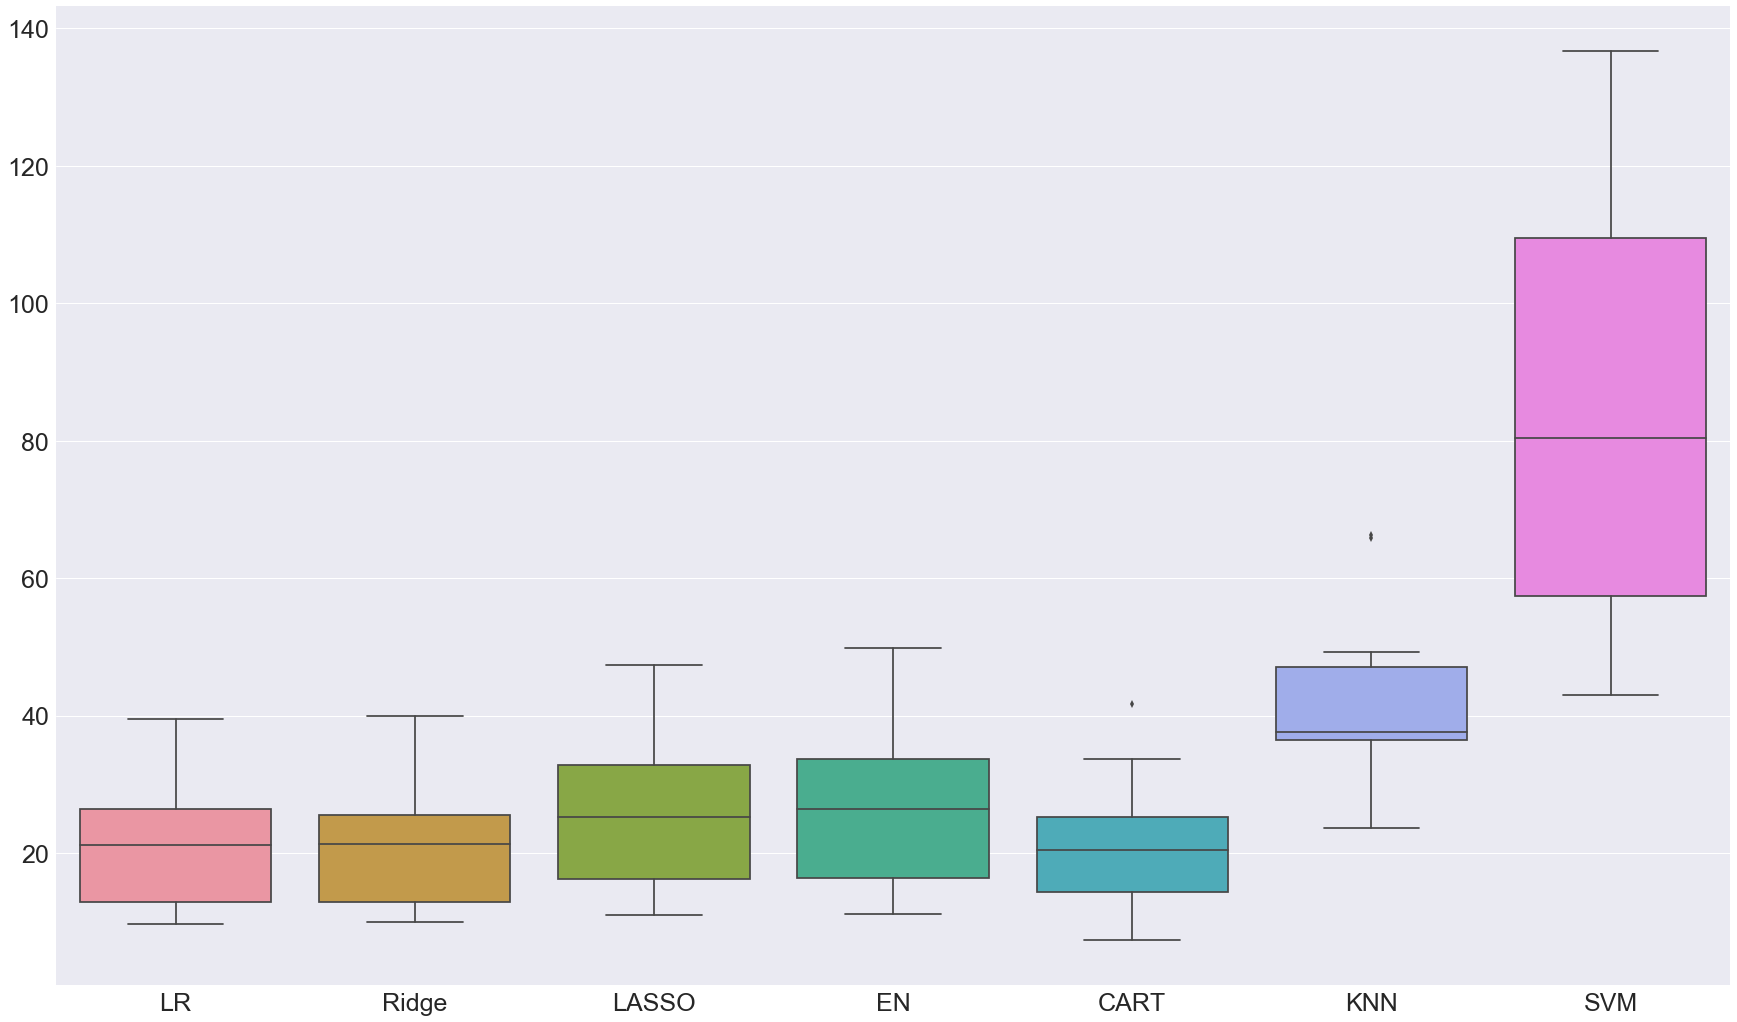

In [18]:
plt.subplots(figsize=(30,18))
sns.set(font_scale=2.5)
sns.boxplot(data=df)

+ LR, Ridge and Cart seem to have the lowest errors and tight distributions
+ KNN and SVM have worse results probably because the data is not Standardized
# Cross validate models with data standardization

In [19]:
pipelines = []
pipelines.append(('scaled_lr',Pipeline([('scaler',StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('scaled_ridge',Pipeline([('scaler',StandardScaler()),('Ridge',Ridge())])))
pipelines.append(('scaled_lasso',Pipeline([('scaler',StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('scaled_en',Pipeline([('scaler',StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('scaled_cart',Pipeline([('scaler',StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('scaled_knn',Pipeline([('scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('scaled_svm',Pipeline([('scaler',StandardScaler()),('SVM',SVR())])))

scaled_results = []
scaled_names = []
for name, model in pipelines:
    k_fold = KFold(n_splits=10,random_state=seed)
    curr_scores = cross_val_score(model,X_train,Y_train,cv=k_fold,scoring='neg_mean_squared_error')
    
    scaled_results.append(curr_scores)
    scaled_names.append(name)
    
    print('%s: err(%.3f%%) std(%.3f%%)'%(name,-1*curr_scores.mean(),curr_scores.std()))

scaled_lr: err(21.380%) std(9.414%)
scaled_ridge: err(21.363%) std(9.402%)
scaled_lasso: err(26.607%) std(8.979%)
scaled_en: err(27.932%) std(10.587%)
scaled_cart: err(23.909%) std(11.306%)
scaled_knn: err(20.108%) std(12.377%)
scaled_svm: err(29.633%) std(17.009%)


# Choose the best models

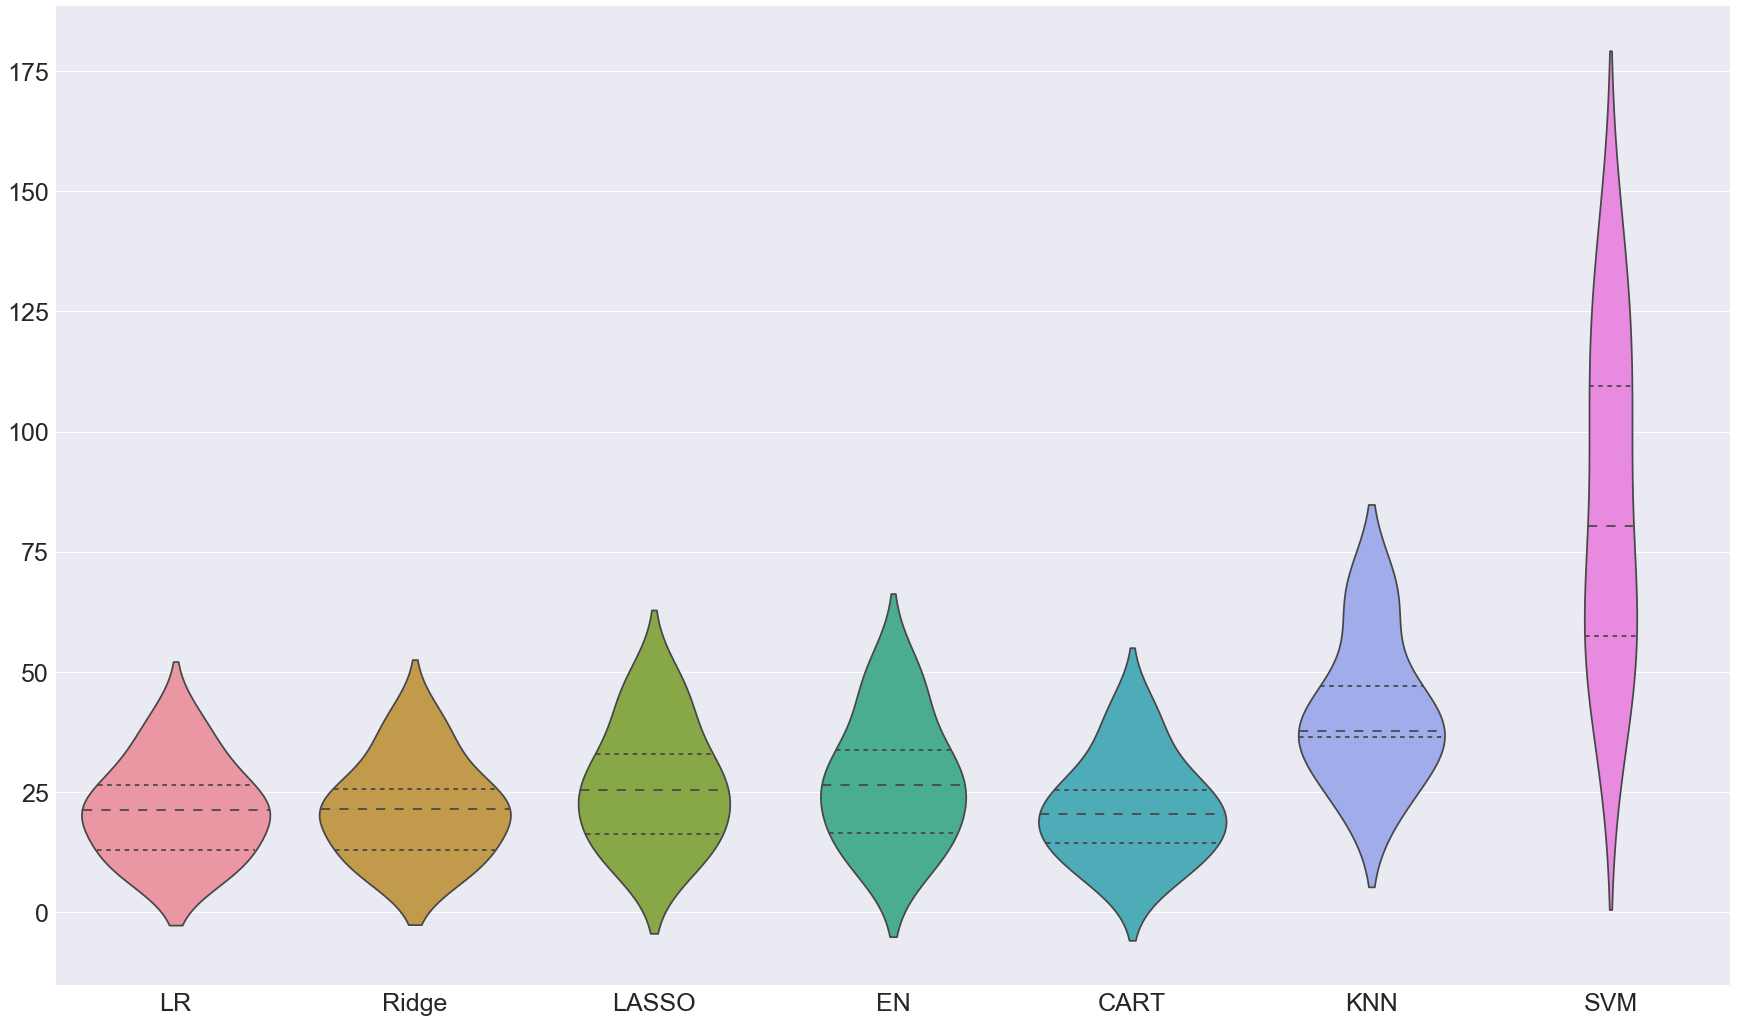

In [20]:
scaled_df = pd.DataFrame(np.array(np.multiply(-1,scaled_results)).T,columns=scaled_names)
plt.subplots(figsize=(30,18))
sns.set(font_scale=2.5)
sns.violinplot(data=df,scale='area',inner='quartile')

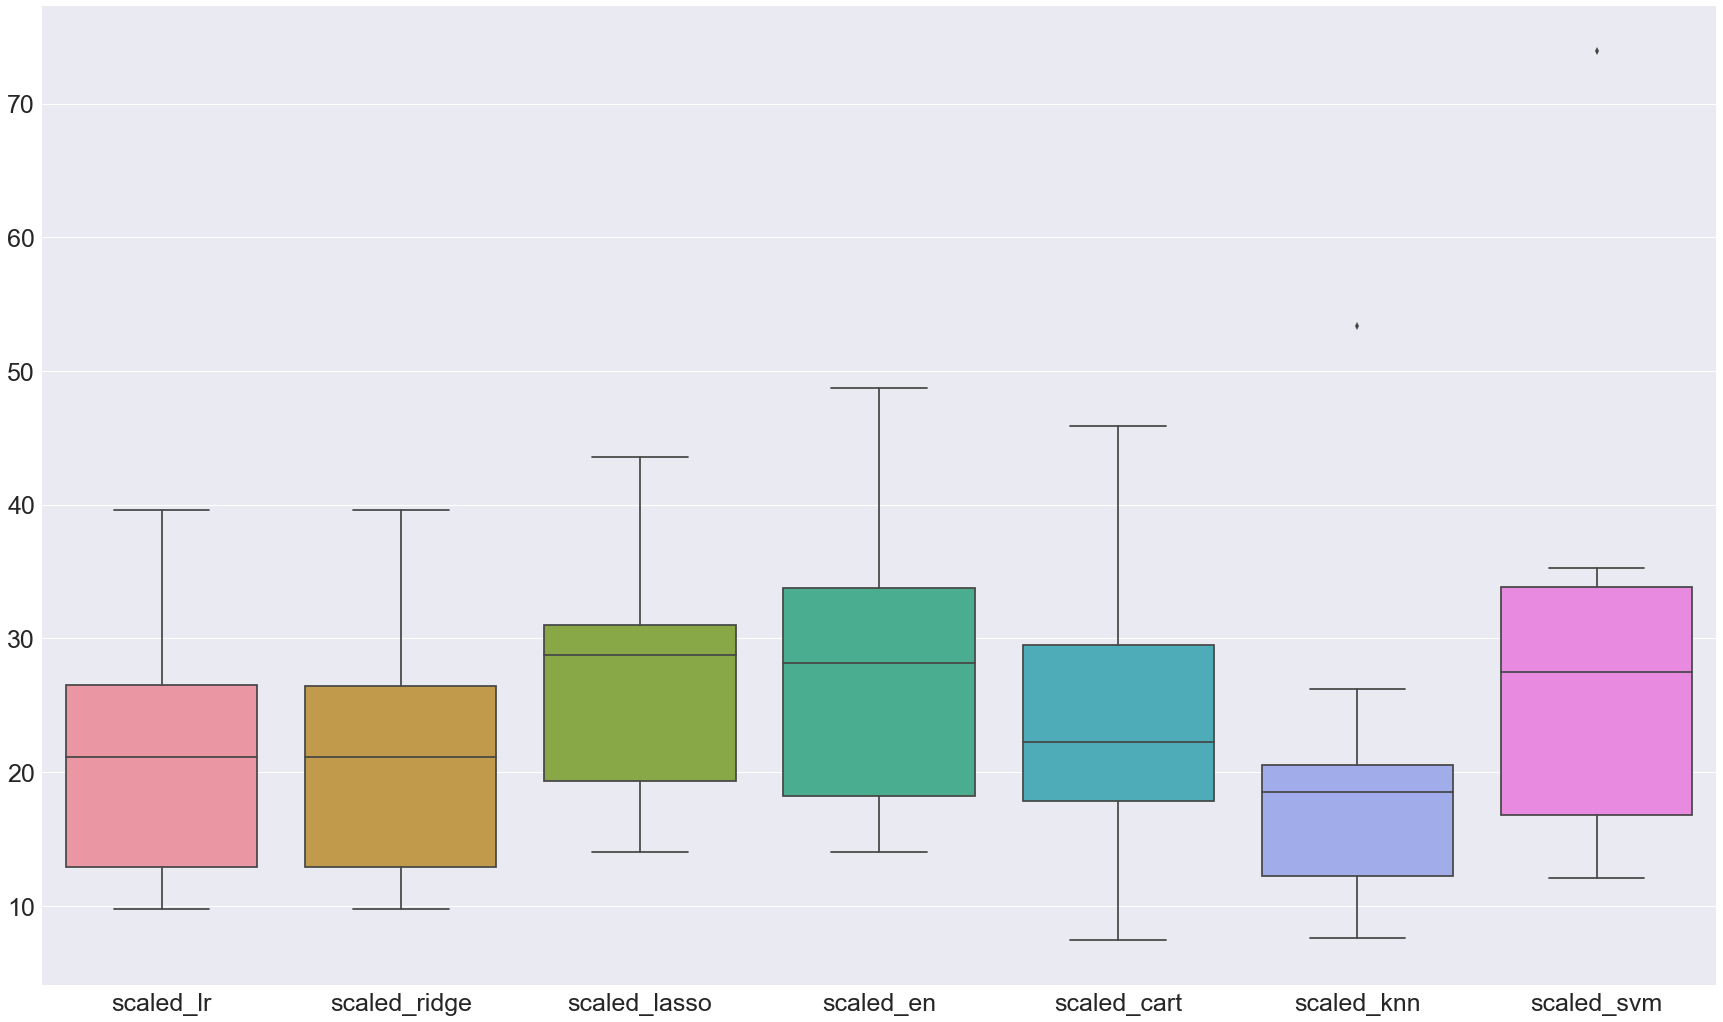

In [21]:
plt.subplots(figsize=(30,18))
sns.set(font_scale=2.5)
sns.boxplot(data=scaled_df)

+ After standardization CART seems to have the best results
# Try to improve knn further using model tuning

In [22]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
k_values = np.arange(1,22,2)
param_grid = {'n_neighbors':k_values}
model = KNeighborsRegressor()
k_fold = KFold(n_splits=10,random_state=seed)
grid = GridSearchCV(estimator = model,param_grid=param_grid,scoring='neg_mean_squared_error',cv=k_fold)
grid_result = grid.fit(X_train_scaled,Y_train)

In [23]:
print('Best score: ', -1* grid.best_score_)
print('Best alpha: ', grid.best_estimator_.n_neighbors)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params =grid_result.cv_results_['params']
for m, s,p in zip(means,stds,params):
    print('err(%.3f%%) std(%.3f%%) params%s'%(-1*m,s,p))

Best score:  18.172136963696367
Best alpha:  3
err(20.209%) std(15.030%) params{'n_neighbors': 1}
err(18.172%) std(12.951%) params{'n_neighbors': 3}
err(20.131%) std(12.204%) params{'n_neighbors': 5}
err(20.576%) std(12.346%) params{'n_neighbors': 7}
err(20.368%) std(11.622%) params{'n_neighbors': 9}
err(21.009%) std(11.610%) params{'n_neighbors': 11}
err(21.152%) std(11.943%) params{'n_neighbors': 13}
err(21.557%) std(11.536%) params{'n_neighbors': 15}
err(22.790%) std(11.567%) params{'n_neighbors': 17}
err(23.872%) std(11.340%) params{'n_neighbors': 19}
err(24.361%) std(11.915%) params{'n_neighbors': 21}


# Check performance using ensemble methods

In [28]:
ensembles = []
ensembles.append(('scaled_adaboost',Pipeline([('scaler',StandardScaler()),('ada',AdaBoostRegressor())])))
ensembles.append(('scaled_gradient_boost',Pipeline([('scaler',StandardScaler()),('gb',GradientBoostingRegressor())])))
ensembles.append(('scaled_random_forest',Pipeline([('scaler',StandardScaler()),('rf',RandomForestRegressor())])))
ensembles.append(('scaled_extra_trees',Pipeline([('scaler',StandardScaler()),('et',ExtraTreesRegressor())])))

results=[]
names=[]
for name, model in ensembles:
    k_fold = KFold(n_splits=10,random_state=seed)
    curr_scores = cross_val_score(model,X_train,Y_train,cv=k_fold,scoring='neg_mean_squared_error')
    
    results.append(curr_scores)
    names.append(name)
    
    print('%s: err(%.3f%%) std(%.3f%%)'%(name,-1*curr_scores.mean(),curr_scores.std()))

scaled_adaboost: err(14.564%) std(7.338%)
scaled_gradient_boost: err(10.317%) std(4.675%)
scaled_random_forest: err(12.181%) std(5.878%)
scaled_extra_trees: err(9.962%) std(5.054%)


# Choose the best model

In [30]:
ensembles_df = pd.DataFrame(np.array(results).T,columns=names)

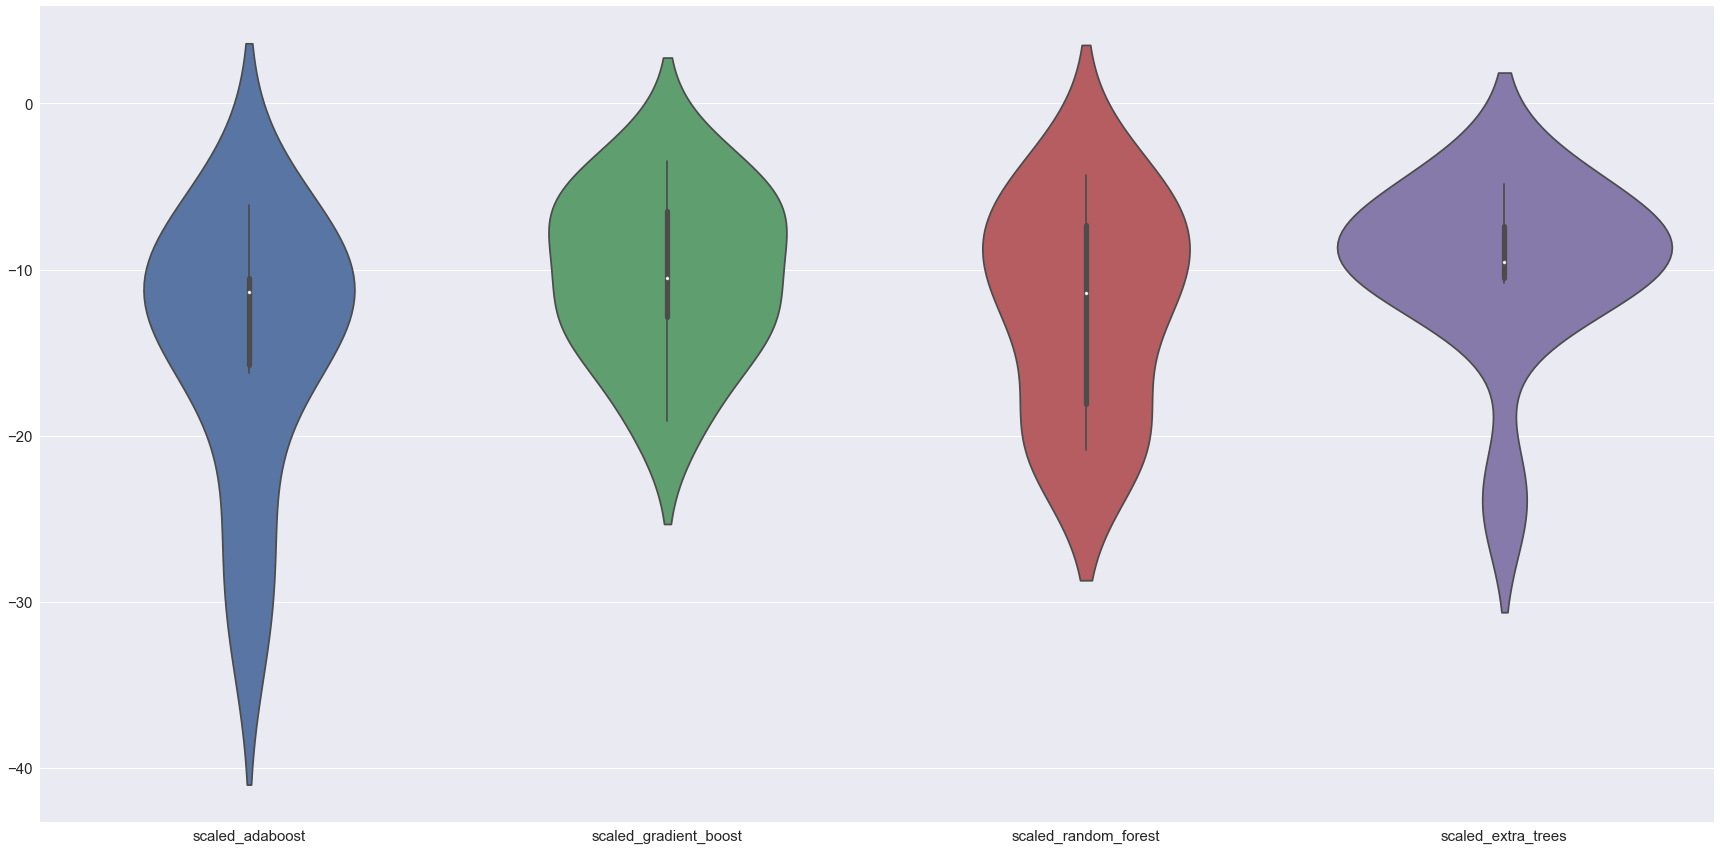

In [33]:
plt.subplots(figsize=(30,15))
sns.set(font_scale=1.5)
sns.violinplot(data=ensembles_df,scale='area')

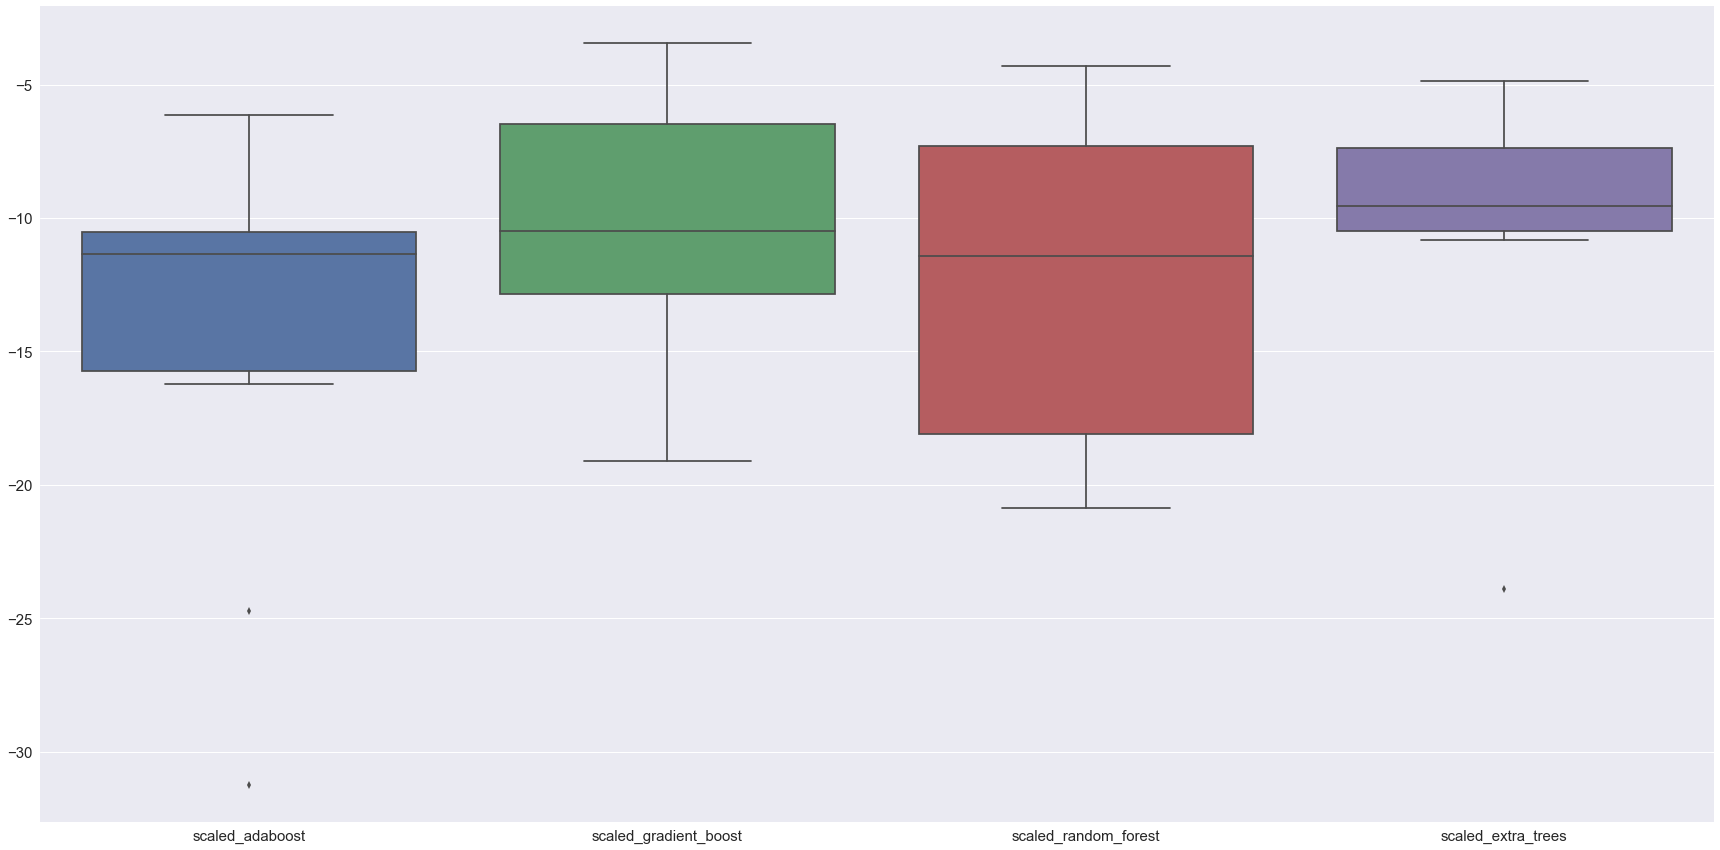

In [36]:
plt.subplots(figsize=(30,15))
sns.set(font_scale=1.5)
sns.boxplot(data=ensembles_df)

+ Extra trees have the best results and also tight error distribution

In [49]:
def print_grid_search_cv_results(grid_results):
    print('Best: %f Using: %s'%(-1*grid_results.best_score_,grid_results.best_params_))
    means = grid_results.cv_results_['mean_test_score']
    stds = grid_results.cv_results_['std_test_score']
    params = grid_results.cv_results_['params']

    for m,s,p in zip(means,stds,params):
        print('%.3f%% (%.3f%%) with %r'%(-1*m,s,p))

# Tune ensemble methods ExtraTreesRegressor

In [46]:
standard_scaler = StandardScaler().fit(X_train)
X_scaled = standard_scaler.transform(X_train)

ensemble_param_grid = {'n_estimators':np.arange(5,51,5)}

ensemble_model = ExtraTreesRegressor(random_state=seed)

k_fold = KFold(n_splits=10,random_state=seed)

ensemble_grid = GridSearchCV(estimator=ensemble_model,param_grid=ensemble_param_grid,scoring='neg_mean_squared_error',cv=k_fold)
ensemble_grid_results = ensemble_grid.fit(X_scaled,Y_train)

In [50]:
print_grid_search_cv_results(ensemble_grid_results)

Best: 9.793133 Using: {'n_estimators': 35}
11.295% (5.583%) with {'n_estimators': 5}
10.784% (5.437%) with {'n_estimators': 10}
10.096% (5.803%) with {'n_estimators': 15}
9.980% (5.874%) with {'n_estimators': 20}
10.091% (5.903%) with {'n_estimators': 25}
9.980% (5.735%) with {'n_estimators': 30}
9.793% (5.638%) with {'n_estimators': 35}
9.840% (5.637%) with {'n_estimators': 40}
9.866% (5.545%) with {'n_estimators': 45}
9.880% (5.638%) with {'n_estimators': 50}


# Tune ensemble methods GradientBoostingRegressor

In [55]:
standard_scaler = StandardScaler().fit(X_train)
X_scaled = standard_scaler.transform(X_train)

ensemble_param_grid = {'n_estimators':np.arange(50,501,50)}

ensemble_model = GradientBoostingRegressor(random_state=seed)

k_fold = KFold(n_splits=10,random_state=seed)

ensemble_grid = GridSearchCV(estimator=ensemble_model,param_grid=ensemble_param_grid,scoring='neg_mean_squared_error',cv=k_fold)
ensemble_grid_results = ensemble_grid.fit(X_scaled,Y_train)

In [56]:
print_grid_search_cv_results(ensemble_grid_results)

Best: 9.351096 Using: {'n_estimators': 500}
10.812% (4.724%) with {'n_estimators': 50}
10.041% (4.442%) with {'n_estimators': 100}
9.694% (4.276%) with {'n_estimators': 150}
9.540% (4.271%) with {'n_estimators': 200}
9.449% (4.263%) with {'n_estimators': 250}
9.430% (4.274%) with {'n_estimators': 300}
9.370% (4.254%) with {'n_estimators': 350}
9.356% (4.268%) with {'n_estimators': 400}
9.351% (4.281%) with {'n_estimators': 450}
9.351% (4.306%) with {'n_estimators': 500}


+ The best model after tuning is GradientBoostingRegressor
# Finalize the model

In [58]:
# finalize the model
scaler = StandardScaler().fit(X_train)
X_rescaled = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed,n_estimators=400)
model.fit(X_scaled,Y_train)

# validate
X_val_rescaled = scaler.transform(X_val)
Y_pred = model.predict(X_val_rescaled)
print(mean_squared_error(Y_pred,Y_val))

11.875252079219903


## The error on the validation set is 11.88%